In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [5]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)

In [6]:
df['Price'] = housing.target

In [7]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [8]:
df['Price'].value_counts()

,count
Price,
5.00001,965
1.37500,122
1.62500,117
1.12500,103
1.87500,93
...,...
3.59200,1
0.54900,1
3.77600,1


In [9]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [10]:
#Multicolinearity>> when one feature is explained by all other features(more than 2)
#When two features>> Correlation
#when more than two features>> multicolinearity>> cluster method, VIF

<Axes: xlabel='AveRooms', ylabel='Price'>

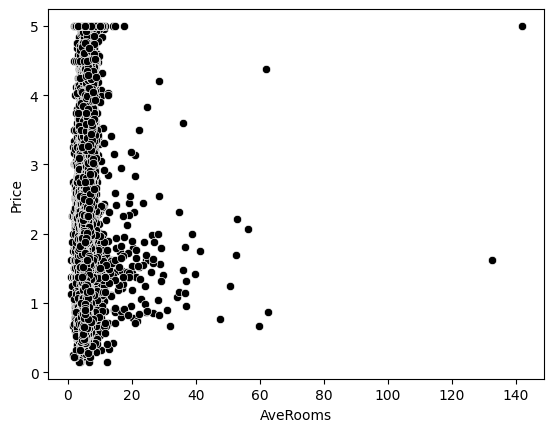

In [11]:
sns.scatterplot(x = 'AveRooms', y = 'Price', data = df, color = 'black')

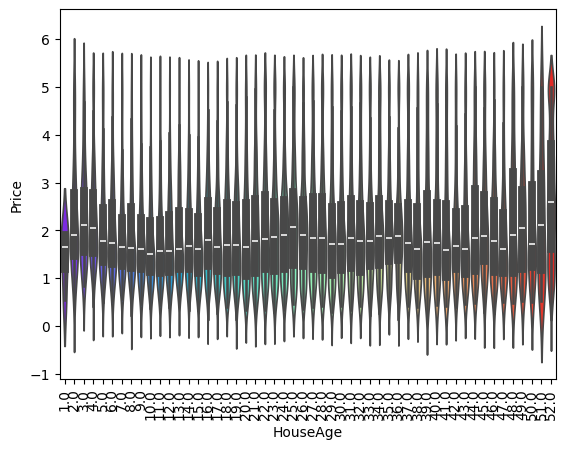

In [12]:
sns.violinplot(x = 'HouseAge', y = 'Price', data = df, palette = 'rainbow')
plt.xticks(rotation = 90)
plt.show()

In [13]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

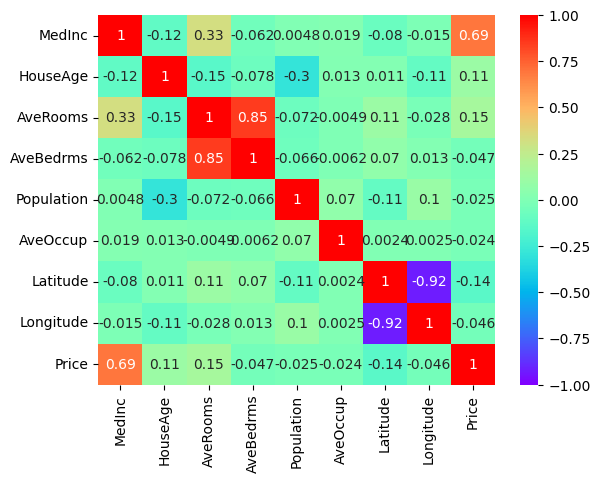

In [14]:
sns.heatmap(df.corr(), annot=True, cmap='rainbow', vmin = -1, vmax = 1)

In [15]:
#Clustermap table shows group cluster relationship

<Figure size 500x500 with 0 Axes>

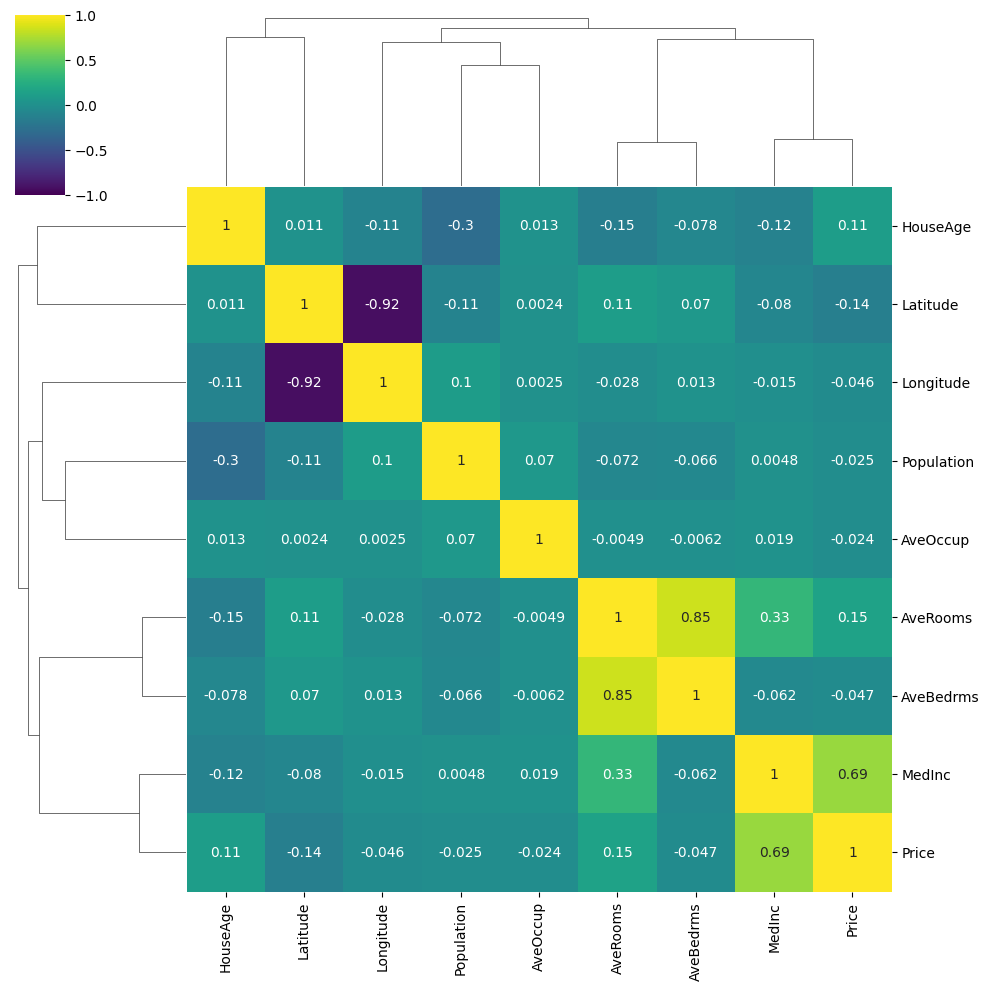

In [16]:
plt.figure(figsize = (5,5))
sns.clustermap(df.corr(), vmin = -1, vmax = 1, cmap = 'viridis', annot = True)

In [17]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price'],
      dtype='object')

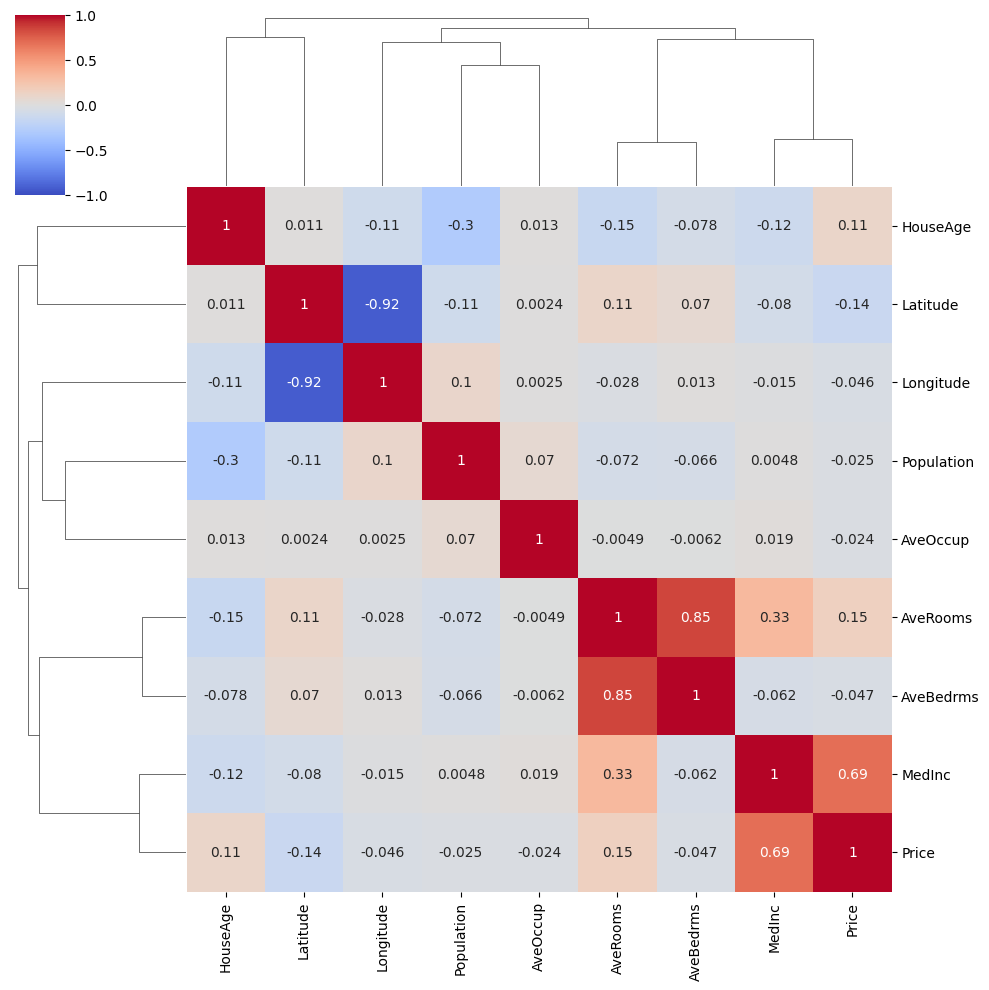

In [18]:
sns.clustermap(df.corr(), vmin = -1, vmax = 1,cmap = 'coolwarm', annot = True)

In [19]:
#Problem with the above [Plot] Interpretation >> we understand the relationship among features together
#but don't understand how much>> Lack of quantitive measure, so we study vif

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
vif = pd.DataFrame()

In [22]:
vif['Features'] = df.columns

In [23]:
vif

,Features
0,MedInc
1,HouseAge
2,AveRooms
3,AveBedrms
4,Population
5,AveOccup
6,Latitude
7,Longitude
8,Price


In [24]:
vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]


In [25]:
vif[
  vif['VIF'] > 10
]

,Features,VIF
0,MedInc,19.624998
2,AveRooms,47.956351
3,AveBedrms,45.358192
6,Latitude,568.497332
7,Longitude,640.064211


In [26]:
vif['VIF']

,VIF
0,19.624998
1,7.592663
2,47.956351
3,45.358192
4,2.936078
5,1.099530
6,568.497332
7,640.064211
8,9.285659


In [27]:
vif

,Features,VIF
0,MedInc,19.624998
1,HouseAge,7.592663
2,AveRooms,47.956351
3,AveBedrms,45.358192
4,Population,2.936078
5,AveOccup,1.099530
6,Latitude,568.497332
7,Longitude,640.064211
8,Price,9.285659


In [28]:
#if VIF> 10, Drop the features one by one, here highest is longitude, we will drop and again
#calculate vif and then again drop the highest value

In [29]:
df1 = df.copy()

In [30]:
df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [31]:
df1.drop('Longitude', axis = 1, inplace = True)

In [32]:
df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,0.847


In [33]:
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF1'] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]


In [34]:
vif

,Features,VIF1
0,MedInc,18.639889
1,HouseAge,7.346583
2,AveRooms,44.714760
3,AveBedrms,42.072000
4,Population,2.796280
5,AveOccup,1.099394
6,Latitude,22.873934
7,Price,9.193500


In [35]:
df1.drop('AveRooms', axis = 1, inplace = True)

In [36]:
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF1'] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]


In [37]:
vif

,Features,VIF1
0,MedInc,10.584081
1,HouseAge,7.260588
2,AveBedrms,6.440667
3,Population,2.762794
4,AveOccup,1.098719
5,Latitude,22.094483
6,Price,8.674858


In [38]:
df1.drop('Latitude', axis = 1, inplace = True)

In [39]:
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF1'] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]


In [40]:
vif

,Features,VIF1
0,MedInc,8.855104
1,HouseAge,4.156145
2,AveBedrms,4.264253
3,Population,2.223926
4,AveOccup,1.098671
5,Price,8.607339


In [41]:
#Now all the features vif is below 10, so we can build the model

In [42]:
df1

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Price
0,8.3252,41.0,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...
20635,1.5603,25.0,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,1.171920,741.0,2.123209,0.847


In [43]:
X = df1.iloc[:, :-1] #Independent Variable
Y = df1.iloc[:, -1] #Target Variable

In [44]:
X

,MedInc,HouseAge,AveBedrms,Population,AveOccup
0,8.3252,41.0,1.023810,322.0,2.555556
1,8.3014,21.0,0.971880,2401.0,2.109842
2,7.2574,52.0,1.073446,496.0,2.802260
3,5.6431,52.0,1.073059,558.0,2.547945
4,3.8462,52.0,1.081081,565.0,2.181467
...,...,...,...,...,...
20635,1.5603,25.0,1.133333,845.0,2.560606
20636,2.5568,18.0,1.315789,356.0,3.122807
20637,1.7000,17.0,1.120092,1007.0,2.325635
20638,1.8672,18.0,1.171920,741.0,2.123209


In [45]:
Y

,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
Scaler = StandardScaler()

In [50]:
Scaler

StandardScaler()

In [51]:
X_train = Scaler.fit_transform(X_train, Y_train)

In [52]:
X_test = Scaler.transform(X_test)

In [53]:
X_train

array([[-0.326196  ,  0.34849025, -0.20836543,  0.76827628,  0.05137609],
       [-0.03584338,  1.61811813, -0.12853018, -0.09890135, -0.11736222],
       [ 0.14470145, -1.95271028, -0.25753771, -0.44981806, -0.03227969],
       ...,
       [-0.49697313,  0.58654547, -0.03921583,  0.28983345,  0.02030568],
       [ 0.96545045, -1.07984112, -0.06626528,  0.30830275,  0.00707608],
       [-0.68544764,  1.85617335, -0.08750798,  1.04883375, -0.08535429]])

In [54]:
X_test

array([[-1.15508475, -0.28632369, -0.17174603, -0.03030109,  0.06740798],
       [-0.70865905,  0.11043502,  0.22347203,  0.12185077, -0.03602975],
       [-0.21040155,  1.85617335,  0.20589202, -0.10241931, -0.14998876],
       ...,
       [ 2.80902421, -0.28632369, -0.34510886,  0.13944058, -0.02646898],
       [-0.57542978,  0.58654547, -0.26214684, -0.17541702, -0.04390537],
       [-0.17259111, -0.92113763, -0.14589658,  0.21507676,  0.05466644]])

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
model = LinearRegression()

In [57]:
model

LinearRegression()

In [58]:
model.fit(X_train, Y_train)

LinearRegression()

In [59]:
model.coef_

array([ 0.82991462,  0.23577521,  0.02418336,  0.04076319, -0.05041237])

In [60]:
model.intercept_

2.071946937378876

In [61]:
y_pred = model.predict(X_test)

In [62]:
y_pred

array([1.03703043, 1.52204595, 2.34333679, ..., 4.33436168, 1.72140546,
       1.71401271])

In [63]:
#Performance metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [64]:
r2_score(Y_test, y_pred)

0.4957564296011395

In [65]:
print(r2_score(Y_test, y_pred))
print(mean_absolute_error(Y_test, y_pred))
print(mean_squared_error(Y_test, y_pred))
print(np.sqrt(mean_squared_error(Y_test, y_pred)))

0.4957564296011395
0.6037729017570816
0.660765301870914
0.8128747147444765


In [66]:
score = r2_score(Y_test, y_pred)

In [67]:
#Adjuster R2

In [68]:
#If Number of Features were low, that's why you dropped the features one by one and checked each time
#What if the no of features are 1000 in number:
#then we can implement using RFE(Recursive Feature Elimination)

In [69]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [70]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [71]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [72]:
from sklearn.feature_selection import RFE

In [73]:
rfe = RFE(LinearRegression(), n_features_to_select = 4)

In [74]:
rfe.fit(X, Y)

RFE(estimator=LinearRegression(), n_features_to_select=4)

In [75]:
rfe.support_

array([ True, False, False,  True, False, False,  True,  True])

In [76]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [77]:
rfe.ranking_

array([1, 3, 2, 1, 5, 4, 1, 1])

In [78]:
rfe.predict(X) #since the train test split is not done we use x Directly

array([3.9375405 , 3.92511713, 3.57437472, ..., 0.2151807 , 0.33706588,
       0.51548338])